# TEST Simple Supervised Learning. Regression

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Data Processing

In [2]:
data_size = 500
x = np.linspace(0, 200, data_size)

y = np.array([-i * i + 1200 for i in np.linspace(-50, 50, num=data_size)])
y = y + np.random.normal(0,100,data_size) # add noise

df = pd.DataFrame({'x': x, 'y': y})
target = ['y']

print("rows: {} \ncolumns: {} \ntarget: {}".format(*df.shape, target))
df.head(5)

rows: 500 
columns: 2 
target: ['y']


,x,y
0,0.000000,-1275.117417
1,0.400802,-1250.090225
2,0.801603,-1333.160978
3,1.202405,-1185.526155
4,1.603206,-1337.737201


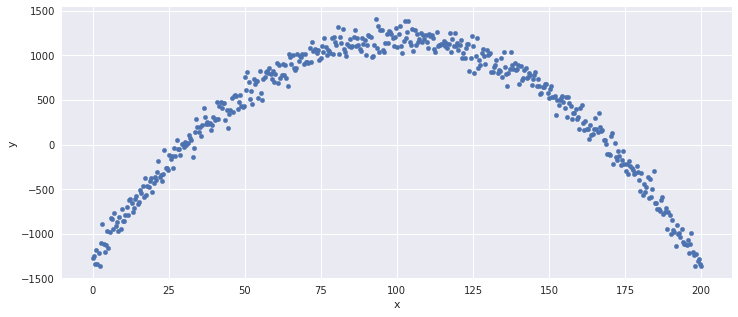

In [3]:
df.plot.scatter(x='x', y='y', figsize=(12,5));

#### Correlation between numerical features and target

In [4]:
df.corr()

,x,y
x,1.000000,-0.008494
y,-0.008494,1.000000


## 2. Neural Network model

In [5]:
from sklearn.model_selection import train_test_split

data = df.copy()

# Standarize x & y
scale = {} 

for col in data:
    mean, std = data[col].mean(), data[col].std()
    data[col] = (data[col] - mean) / std
    scale[col] = [mean, std]

test_size = 0

train, test = train_test_split(data, test_size=test_size, random_state=9, shuffle=True)
x_train, y_train = train.drop(target, axis=1).values, train[target].values


### Build and train the Neural Network

Using TensorFlow backend.


time: 	 3.9 s


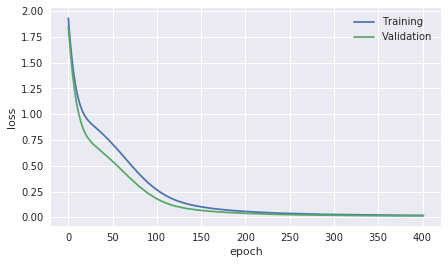

In [6]:
from time import time
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

#weights = keras.initializers.RandomNormal(stddev=0.01)

model = Sequential()

model.add(Dense(8, input_dim=1, activation='tanh'))

model.add(Dense(1, activation=None))

model.compile(loss='mean_squared_error', optimizer='adam')


callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0)]
t0 = time()

history = model.fit(x_train, y_train, epochs=1000, batch_size=32, 
                    validation_split=0.25, callbacks=callbacks, verbose=0)

print("time: \t {:.1f} s".format(time() - t0))

hist = history.history

plt.figure(figsize=(7, 4))
plt.plot(hist['loss'], label='Training')
if 'val_loss' in hist:
    plt.plot(hist['val_loss'], label='Validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Check the model

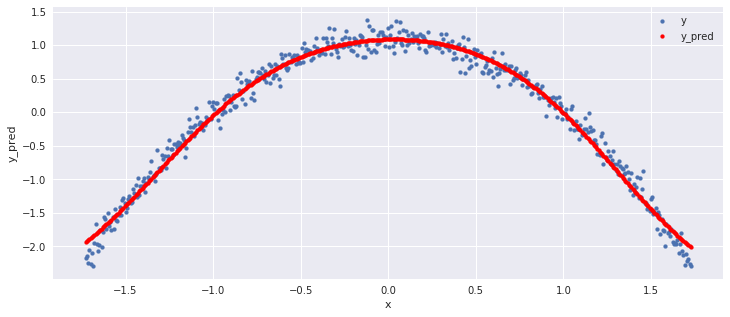

In [7]:
x_test = data.drop(target, axis=1).values

pred = model.predict(x_test, verbose=0)

df_pred = data.copy()
df_pred['y_pred'] = pred

ax = df_pred.plot.scatter('x', 'y', figsize=(12, 5), s=15, label='y')
df_pred.plot.scatter('x', 'y_pred', ax=ax, c='r', s=15, label='y_pred');

### Compare with non-neural network models

#### XGBoost

/home/angel/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training Time:  	 0.019 s


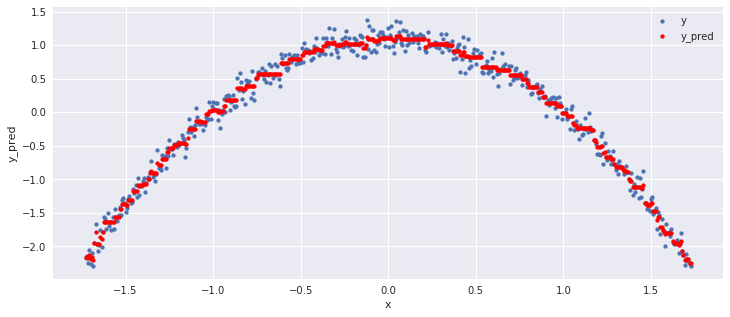

In [8]:
from time import time
import xgboost as xgb

reg=None
reg = xgb.XGBRegressor()

t0 = time()

reg.fit(x_train, y_train[:, 0])
train_time = time() - t0

print("Training Time:  \t {:.3f} s".format(train_time))

y_pred = reg.predict(x_test)

df_pred2 = data.copy()
df_pred2['y_pred'] = y_pred

ax = df_pred2.plot.scatter('x', 'y', figsize=(12, 5), s=15, label='y')
df_pred2.plot.scatter('x', 'y_pred', ax=ax, c='r', s=15, label='y_pred');

#### Classical Machine Learning

Training Time:  	 0.010 s


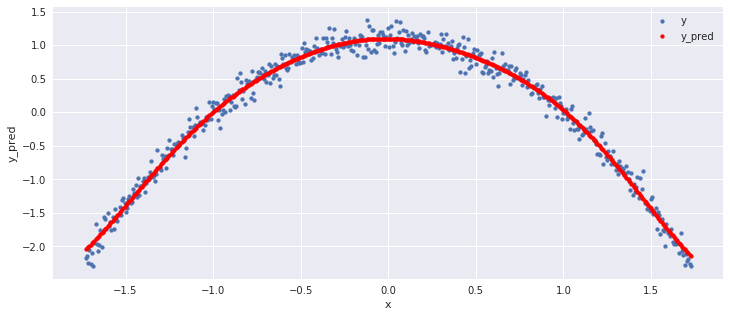

In [9]:
# Support Vector regression

from sklearn.svm import SVR

reg=None
reg = SVR(C=1)

t0 = time()

reg.fit(x_train, y_train[:, 0])

print("Training Time:  \t {:.3f} s".format(time() - t0 ))


train_time = time() - t0
y_pred = reg.predict(x_test)

df_pred3 = data.copy()
df_pred3['y_pred'] = y_pred

ax = df_pred3.plot.scatter('x', 'y', figsize=(12, 5), s=15, label='y')
df_pred3.plot.scatter('x', 'y_pred', ax=ax, c='r', s=15, label='y_pred');

Training Time:  	 0.008 s


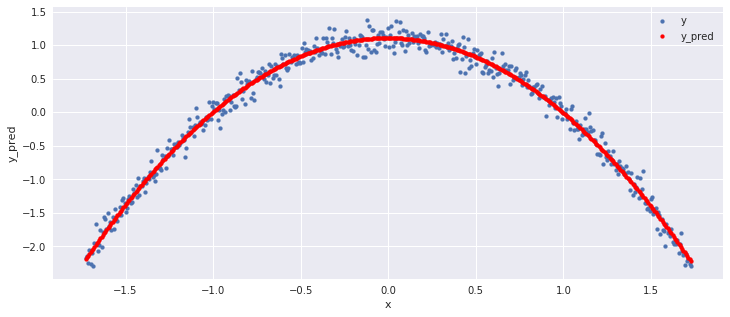

In [10]:
#  Polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

reg=None

reg = LinearRegression()

t0 = time()

reg.fit(x_train_poly, y_train[:, 0])

print("Training Time:  \t {:.3f} s".format(time() - t0 ))


train_time = time() - t0
y_pred = reg.predict(x_test_poly)

df_pred3 = data.copy()
df_pred3['y_pred'] = y_pred

ax = df_pred3.plot.scatter('x', 'y', figsize=(12, 5), s=15, label='y')
df_pred3.plot.scatter('x', 'y_pred', ax=ax, c='r', s=15, label='y_pred');